In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 1. Load the dataset into python environment

In [2]:
df=pd.read_csv(r"C:\Users\user\Downloads\titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. Make ‘PassengerId’ as the index column

In [3]:
df=pd.read_csv(r"C:\Users\user\Downloads\titanic_dataset.csv",index_col='PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
df.shape

(891, 11)

# 4. Fill in all the missing values present in all the columns in the dataset

In [9]:
df['Age']=df['Age'].fillna(df['Age'].median()) 

In [10]:
for i in ['Cabin','Embarked']:
    df[i]=df[i].fillna(df[i].mode()[0])

In [11]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S


In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd22d9e8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd22d9ef40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd22d9e490>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd234566a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd23456a30>],
 'means': []}

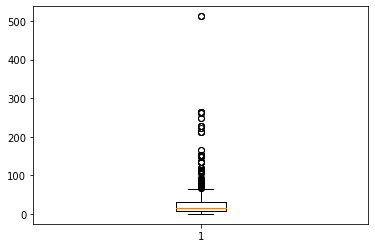

In [13]:
plt.boxplot(df['Fare'])

In [14]:
Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')
print('Q1=',Q1,'Q2=',Q2,'Q3=',Q3)
df['Fare'].median()
IQR=Q3-Q1
print('IQR=',IQR)
low_limit=Q1-1.5*IQR
upp_limit=Q3+1.5*IQR
print('LOWER LIMIT=',low_limit,'UPPER LIMIT=',upp_limit)

Q1= 7.9104 Q2= 14.4542 Q3= 31.0
IQR= 23.0896
LOWER LIMIT= -26.724 UPPER LIMIT= 65.6344


In [15]:
outlier=[]
for x in df['Fare']:
    if((x<low_limit) or (x>upp_limit)):
       outlier.append(x) 

In [16]:
ind1=df['Fare']>upp_limit
ind2=df.loc[ind1].index
print(ind2)

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)


In [17]:
df.drop([2, 28, 32, 35, 53, 62, 63, 73, 89, 103, 119, 121, 125, 140, 152, 160, 181, 196, 202, 216, 219, 225, 231, 246, 257, 258, 259, 263, 269, 270, 276, 291, 292, 298, 300, 306, 307, 308, 311, 312, 319, 320, 325, 326, 333, 335, 337, 338, 342, 367, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 439, 446, 454, 485, 487, 497, 499, 505, 506, 521, 528, 538, 541, 545, 551, 558, 559, 582, 586, 588, 592, 610, 628, 642, 646, 656, 660, 661, 666, 680, 682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 746, 760, 764, 766, 780, 790, 793, 803, 821, 830, 836, 847, 850, 857, 864, 880],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd2354e9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd2355b160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd2354e610>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd2355b880>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd2355bc10>],
 'means': []}

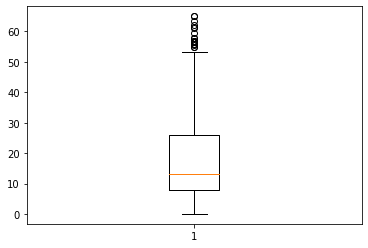

In [18]:
plt.boxplot(df['Fare'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd235c2310>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd235c2a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd235b5f40>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd235cf190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd235cf520>],
 'means': []}

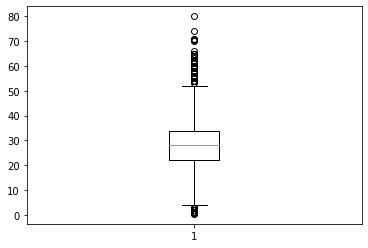

In [19]:
plt.boxplot(df['Age'])

In [20]:
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')
print('Q1=',Q1,'Q2=',Q2,'Q3=',Q3)
df['Age'].median()
IQR=Q3-Q1
print('IQR=',IQR)
low_limit=Q1-1.5*IQR
upp_limit=Q3+1.5*IQR
print('LOWER LIMIT=',low_limit,'UPPER LIMIT=',upp_limit)

Q1= 22.0 Q2= 28.0 Q3= 34.0
IQR= 12.0
LOWER LIMIT= 4.0 UPPER LIMIT= 52.0


In [21]:
outlier=[]
for x in df['Age']:
    if((x<low_limit) or (x>upp_limit)):
       outlier.append(x) 

In [22]:
outlier

[54.0,
 2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 3.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 3.0,
 2.0,
 59.0,
 54.0,
 62.0,
 3.0,
 65.0,
 54.0,
 61.0,
 2.0,
 3.0,
 3.0,
 1.0,
 1.0,
 3.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 2.0,
 64.0,
 62.0,
 62.0,
 53.0,
 54.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 70.0,
 60.0,
 60.0,
 0.67,
 57.0,
 54.0,
 1.0,
 0.42,
 2.0,
 1.0,
 0.83,
 74.0]

In [23]:
ind3=df['Age']>upp_limit
ind4=df.loc[ind3].index
print(ind4)
ind5=df['Age']<low_limit
ind6=df.loc[ind5].index
print(ind6)

Int64Index([  7,  12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 233, 250,
            253, 281, 318, 327, 457, 468, 484, 488, 493, 494, 514, 546, 556,
            571, 572, 583, 626, 627, 631, 648, 673, 685, 695, 773, 775, 852],
           dtype='int64', name='PassengerId')
Int64Index([  8,  17,  44,  79, 120, 165, 173, 184, 194, 206, 262, 341, 349,
            375, 382, 387, 408, 470, 480, 531, 643, 645, 756, 789, 804, 825,
            828, 832],
           dtype='int64', name='PassengerId')


In [24]:
df.drop([  7,  12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 233, 250,
            253, 281, 318, 327, 457, 468, 484, 488, 493, 494, 514, 546, 556,
            571, 572, 583, 626, 627, 631, 648, 673, 685, 695, 773, 775, 852],inplace=True)

In [25]:
df.drop([  8,  17,  44,  79, 120, 165, 173, 184, 194, 206, 262, 341, 349,
            375, 382, 387, 408, 470, 480, 531, 643, 645, 756, 789, 804, 825,
            828, 832],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd23639af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd23647130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd23639760>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd23647850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd23647be0>],
 'means': []}

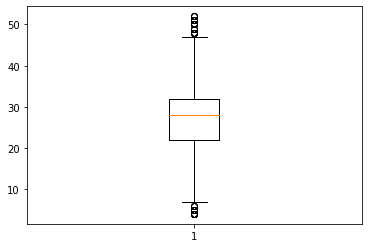

In [26]:
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd236a7160>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd236a7880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd23698d90>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd236a7fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd236b3370>],
 'means': []}

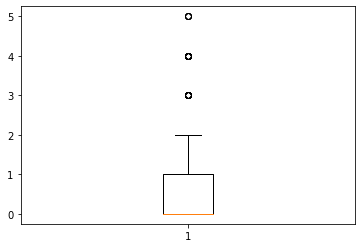

In [27]:
plt.boxplot(df['SibSp'])

In [28]:
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')
print('Q1=',Q1,'Q2=',Q2,'Q3=',Q3)
df['SibSp'].median()
IQR=Q3-Q1
print('IQR=',IQR)
low_limit=Q1-1.5*IQR
upp_limit=Q3+1.5*IQR
print('LOWER LIMIT=',low_limit,'UPPER LIMIT=',upp_limit)

Q1= 0.0 Q2= 0.0 Q3= 1.0
IQR= 1.0
LOWER LIMIT= -1.5 UPPER LIMIT= 2.5


In [29]:
outlier=[]
for x in df['SibSp']:
    if((x<low_limit) or (x>upp_limit)):
       outlier.append(x)

In [30]:
outlier

[3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4]

In [31]:
ind1=df['SibSp']>upp_limit
df.loc[ind1].index

Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 267,
            279, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788, 814, 820,
            851],
           dtype='int64', name='PassengerId')

In [32]:
df.drop([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 267,
            279, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788, 814, 820,
            851],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd2370c070>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd2370c790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd236fcca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd2370ceb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd23718280>],
 'means': []}

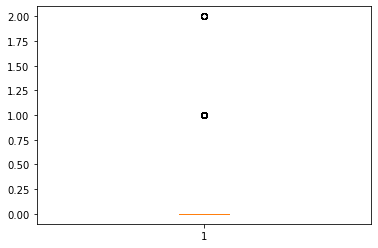

In [33]:
plt.boxplot(df['SibSp'])

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [34]:
y = df['Survived']
X=df.drop('Survived',axis=1)
X = X.drop('Name',axis=1)
X = X.drop('Sex',axis=1)
X = X.drop('Ticket',axis=1)
X = X.drop('Cabin',axis=1)
X = X.drop('Embarked',axis=1)
X

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
6,3,28.0,0,0,8.4583
...,...,...,...,...,...
887,2,27.0,0,0,13.0000
888,1,19.0,0,0,30.0000
889,3,28.0,1,2,23.4500


In [35]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(X)
X=pd.DataFrame(X)
X

,0,1,2,3,4
0,1.0,0.375000,0.5,0.000000,0.111538
1,1.0,0.458333,0.0,0.000000,0.121923
2,0.0,0.645833,0.5,0.000000,0.816923
3,1.0,0.645833,0.0,0.000000,0.123846
4,1.0,0.500000,0.0,0.000000,0.130128
...,...,...,...,...,...
676,0.5,0.479167,0.0,0.000000,0.200000
677,0.0,0.312500,0.0,0.000000,0.461538
678,1.0,0.500000,0.5,0.333333,0.360769
679,0.0,0.458333,0.0,0.000000,0.461538


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

MSE is: 0.18566529140232713
R squared value is: 0.11464637847299863
